In [1]:
import pandas as pd
import io
import requests
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import h5py
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # Análisis de Componentes Principales
from sklearn.decomposition import KernelPCA # Kernel PCA
from sklearn.decomposition import SparsePCA # PCA esparcido
from sklearn.decomposition import MiniBatchSparsePCA # Mini Batch PCA esparcido
from sklearn.utils.extmath import safe_sparse_dot # Producto punto entre matrices esparcidos para SparsePCA.
from sklearn.decomposition import IncrementalPCA # PCA incremental
from sklearn.decomposition import FastICA # Análisis de Componentes Independientes
from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE # TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,balanced_accuracy_score,precision_score,f1_score,average_precision_score
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Embedding.csv')

In [3]:
data.head(10)

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_758,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767
0,-0.038697,0.056531,0.014291,-0.090218,0.044688,-0.096564,-0.031730,0.003258,0.095233,-0.087979,...,-0.002202,0.002461,-0.076560,-0.107523,-0.000543,0.112858,0.059542,-0.040384,-0.026678,-0.046287
1,-0.033285,0.036982,0.042416,-0.101813,0.044333,-0.100968,-0.065766,0.014792,0.049005,-0.094288,...,0.030529,-0.007058,-0.068319,-0.139354,-0.054758,0.126866,0.074703,-0.120616,-0.025233,-0.011219
2,-0.044214,0.062124,0.017362,-0.113754,0.043926,-0.098733,-0.070465,0.004263,0.065432,-0.090390,...,-0.009436,-0.013152,-0.068776,-0.110305,-0.043520,0.110979,0.073648,-0.063428,-0.045474,-0.038345
3,-0.057279,0.051750,0.031811,-0.096803,0.046696,-0.093878,-0.061002,-0.013117,0.078209,-0.096927,...,-0.007264,-0.009776,-0.077911,-0.120516,-0.057491,0.097555,0.077052,-0.095396,-0.055069,-0.053286
4,-0.037350,0.069896,0.008028,-0.067640,0.027968,-0.117158,-0.041774,-0.014320,0.077868,-0.080117,...,0.024209,-0.008687,-0.086265,-0.102610,0.006147,0.114367,0.091128,-0.098419,-0.048066,0.018384
5,-0.023359,0.033341,0.030687,-0.118000,0.052176,-0.074508,-0.065338,0.001210,0.075481,-0.113117,...,-0.039779,-0.026842,-0.081079,-0.139352,-0.061132,0.090941,0.070882,-0.050633,-0.036440,-0.035949
6,-0.015998,0.111024,0.000356,-0.117776,0.050454,-0.110477,-0.040158,0.009245,0.078167,-0.065183,...,-0.002440,0.011385,-0.057312,-0.088513,0.004823,0.106632,0.105640,-0.066336,-0.059502,-0.038462
7,-0.043900,0.074426,0.007889,-0.116784,0.052592,-0.081032,-0.040583,-0.015907,0.064732,-0.078498,...,0.022427,-0.017749,-0.062117,-0.106238,-0.027354,0.133222,0.086415,-0.084538,-0.050256,-0.031425
8,-0.057529,0.065898,0.010932,-0.106483,0.068224,-0.089588,-0.031364,0.010203,0.050784,-0.067740,...,0.013002,-0.001534,-0.071455,-0.099658,-0.018965,0.119505,0.082106,-0.052063,-0.047148,-0.005420
9,-0.040660,0.071059,0.018229,-0.119909,0.030909,-0.080207,-0.054554,0.017107,0.074701,-0.071977,...,-0.001499,-0.005814,-0.070371,-0.105386,-0.017061,0.127010,0.063738,-0.074505,-0.036253,-0.049743


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Columns: 768 entries, embedding_0 to embedding_767
dtypes: float64(768)
memory usage: 85.0 MB


In [168]:
MM = MinMaxScaler()
MM.fit(data)
data_norm = MM.transform(data)
Nombres = data.columns
data_norm = pd.DataFrame(data_norm, columns = Nombres)

In [6]:
Num_Componentes = data_norm.shape[1]

pca = PCA(iterated_power='auto', n_components = Num_Componentes, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)


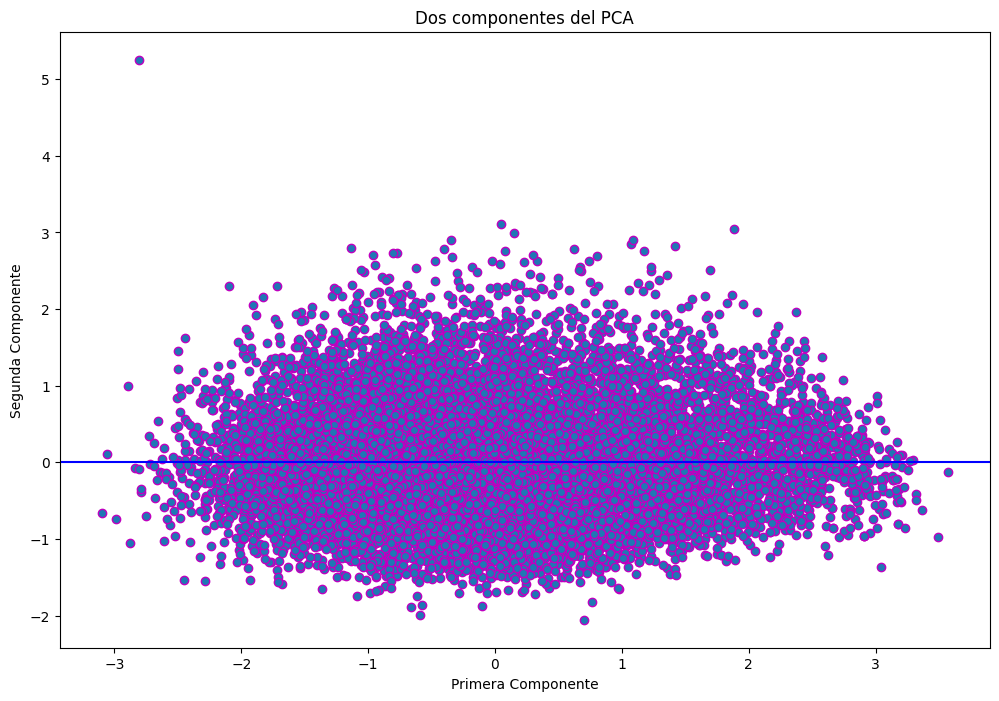

In [7]:
Variables_Principales = pca.fit_transform(data_norm) 
# Transformarmos las componentes principales a partir de los datos

fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Variables_Principales[:,0], Variables_Principales[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del PCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

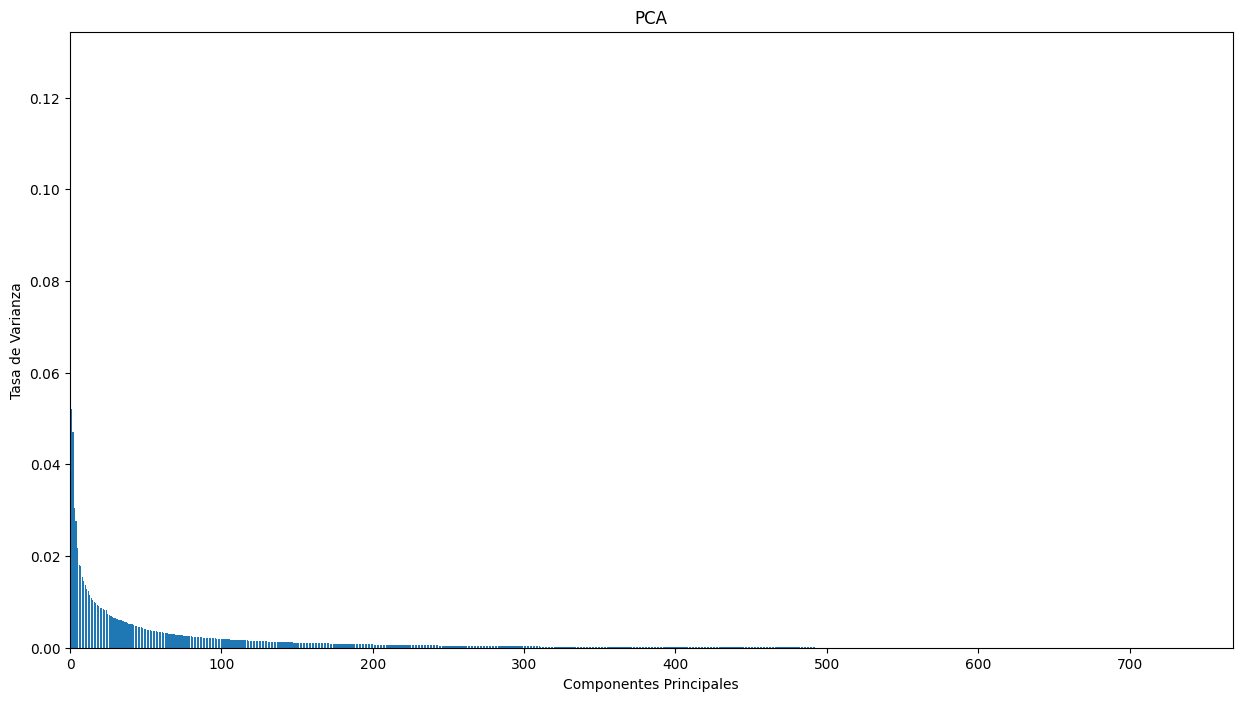

In [8]:
Varianza = pca.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales

fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(len(Varianza)), Varianza)
plt.xlabel('Componentes Principales')
plt.ylabel('Tasa de Varianza')
plt.title('PCA')
plt.xlim(0, len(Varianza))
plt.show()

In [9]:
Importancia_Componentes = pd.DataFrame(Varianza)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 4 componentes: ", format(100*Importancia_Componentes.loc[:,0:3].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 6 componentes: ", format(100*Importancia_Componentes.loc[:,0:5].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 7 componentes: ", format(100*Importancia_Componentes.loc[:,0:6].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 8 componentes: ", format(100*Importancia_Componentes.loc[:,0:7].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 9 componentes: ", format(100*Importancia_Componentes.loc[:,0:8].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 11 componentes: ", format(100*Importancia_Componentes.loc[:,0:10].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 12 componentes: ", format(100*Importancia_Componentes.loc[:,0:11].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 13 componentes: ", format(100*Importancia_Componentes.loc[:,0:12].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 14 componentes: ", format(100*Importancia_Componentes.loc[:,0:13].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 15 componentes: ", format(100*Importancia_Componentes.loc[:,0:14].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 16 componentes: ", format(100*Importancia_Componentes.loc[:,0:15].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 17 componentes: ", format(100*Importancia_Componentes.loc[:,0:16].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 18 componentes: ", format(100*Importancia_Componentes.loc[:,0:17].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 19 componentes: ", format(100*Importancia_Componentes.loc[:,0:18].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 20 componentes: ", format(100*Importancia_Componentes.loc[:,0:19].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 21 componentes: ", format(100*Importancia_Componentes.loc[:,0:20].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 22 componentes: ", format(100*Importancia_Componentes.loc[:,0:21].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 23 componentes: ", format(100*Importancia_Componentes.loc[:,0:22].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 24 componentes: ", format(100*Importancia_Componentes.loc[:,0:23].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 25 componentes: ", format(100*Importancia_Componentes.loc[:,0:24].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 26 componentes: ", format(100*Importancia_Componentes.loc[:,0:25].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 27 componentes: ", format(100*Importancia_Componentes.loc[:,0:26].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 28 componentes: ", format(100*Importancia_Componentes.loc[:,0:27].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 29 componentes: ", format(100*Importancia_Componentes.loc[:,0:28].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 30 componentes: ", format(100*Importancia_Componentes.loc[:,0:29].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 31 componentes: ", format(100*Importancia_Componentes.loc[:,0:30].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 32 componentes: ", format(100*Importancia_Componentes.loc[:,0:31].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 33 componentes: ", format(100*Importancia_Componentes.loc[:,0:32].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 34 componentes: ", format(100*Importancia_Componentes.loc[:,0:33].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 35 componentes: ", format(100*Importancia_Componentes.loc[:,0:34].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 36 componentes: ", format(100*Importancia_Componentes.loc[:,0:35].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 37 componentes: ", format(100*Importancia_Componentes.loc[:,0:36].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 38 componentes: ", format(100*Importancia_Componentes.loc[:,0:37].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 39 componentes: ", format(100*Importancia_Componentes.loc[:,0:38].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 40 componentes: ", format(100*Importancia_Componentes.loc[:,0:39].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 41 componentes: ", format(100*Importancia_Componentes.loc[:,0:40].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 42 componentes: ", format(100*Importancia_Componentes.loc[:,0:41].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 43 componentes: ", format(100*Importancia_Componentes.loc[:,0:42].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 44 componentes: ", format(100*Importancia_Componentes.loc[:,0:43].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 45 componentes: ", format(100*Importancia_Componentes.loc[:,0:44].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 46 componentes: ", format(100*Importancia_Componentes.loc[:,0:45].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 47 componentes: ", format(100*Importancia_Componentes.loc[:,0:46].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 48 componentes: ", format(100*Importancia_Componentes.loc[:,0:47].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 49 componentes: ", format(100*Importancia_Componentes.loc[:,0:48].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 50 componentes: ", format(100*Importancia_Componentes.loc[:,0:49].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 59 componentes: ", format(100*Importancia_Componentes.loc[:,0:58].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 70 componentes: ", format(100*Importancia_Componentes.loc[:,0:69].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 71 componentes: ", format(100*Importancia_Componentes.loc[:,0:70].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 76 componentes: ", format(100*Importancia_Componentes.loc[:,0:75].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 81 componentes: ", format(100*Importancia_Componentes.loc[:,0:80].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 82 componentes: ", format(100*Importancia_Componentes.loc[:,0:81].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 85 componentes: ", format(100*Importancia_Componentes.loc[:,0:84].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 86 componentes: ", format(100*Importancia_Componentes.loc[:,0:85].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 91 componentes: ", format(100*Importancia_Componentes.loc[:,0:90].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 94 componentes: ", format(100*Importancia_Componentes.loc[:,0:93].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 96 componentes: ", format(100*Importancia_Componentes.loc[:,0:95].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 106 componentes: ", format(100*Importancia_Componentes.loc[:,0:105].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 107 componentes: ", format(100*Importancia_Componentes.loc[:,0:106].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 111 componentes: ", format(100*Importancia_Componentes.loc[:,0:110].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 121 componentes: ", format(100*Importancia_Componentes.loc[:,0:120].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 131 componentes: ", format(100*Importancia_Componentes.loc[:,0:130].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 151 componentes: ", format(100*Importancia_Componentes.loc[:,0:150].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 171 componentes: ", format(100*Importancia_Componentes.loc[:,0:170].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 201 componentes: ", format(100*Importancia_Componentes.loc[:,0:200].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 210 componentes: ", format(100*Importancia_Componentes.loc[:,0:209].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 231 componentes: ", format(100*Importancia_Componentes.loc[:,0:230].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 250 componentes: ", format(100*Importancia_Componentes.loc[:,0:249].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 3 componentes:  [22.71183746]
Porcentaje de Varianza detectada para las primeras 4 componentes:  [25.75458207]
Porcentaje de Varianza detectada para las primeras 5 componentes:  [28.5184685]
Porcentaje de Varianza detectada para las primeras 6 componentes:  [30.69768293]
Porcentaje de Varianza detectada para las primeras 7 componentes:  [32.49917357]
Porcentaje de Varianza detectada para las primeras 8 componentes:  [34.27901063]
Porcentaje de Varianza detectada para las primeras 9 componentes:  [35.81551838]
Porcentaje de Varianza detectada para las primeras 10 componentes:  [37.26088384]
Porcentaje de Varianza detectada para las primeras 11 componentes:  [38.62566211]
Porcentaje de Varianza detectada para las primeras 12 componentes:  [39.9034684]
Porcentaje de Varianza detectada para las primeras 13 componentes:  [41.13759121]
Porcentaje de Varianza detectada para las primeras 14 componentes:  [42.29288368]
Porcentaje de Varianza de

In [10]:
Num_Componentes = 250

pca = PCA(iterated_power='auto', n_components = Num_Componentes, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

In [11]:
data_norm_pca = pca.fit_transform(data_norm) 

In [12]:
data_norm_pca.shape

(14507, 250)

In [14]:
df = pd.read_excel('df_all.xlsx')

In [15]:
df.shape

(14507, 5)

In [16]:
df.head()

,Unnamed: 0,id,tweet,classification,tweet_
0,0,809927403615256576,En definitiva! Me quedÃ© sin campo para ir a T...,0,definitivo quedar campo ir mentalizado hasta q...
1,1,796040775364710400,@dianalaa32 Es una escena de uno de los docume...,2,escena documental respetado naturaleza planet ...
2,2,802912779854352384,QuÃ© feo es tener que terminar con alguien; y ...,0,feo tener terminar alguien dos persona aÃºn am...
3,3,800835505717972992,"OÃ­do en McDonalds ""el mejor mannequin challen...",0,oer mcdonalds mejor challenge visto hasta ahor...
4,4,791640101751230464,Tengo que aceptar que me esta hundiendo el con...,1,aceptar hundir consumismo nuevo pro gorro hero...


In [17]:
df.columns

Index(['Unnamed: 0', 'id', 'tweet', 'classification', 'tweet_'], dtype='object')

In [18]:
data_norm_pca

array([[ 5.06186696e-01, -6.48321125e-02,  1.27229077e+00, ...,
         9.91011528e-03, -1.80700477e-02,  5.89774202e-02],
       [-2.57454572e-01,  1.25388784e+00, -7.73515974e-01, ...,
        -3.16941299e-02,  4.00605861e-02, -4.45541881e-02],
       [-1.06110504e+00,  6.07779236e-01,  1.42104788e+00, ...,
         7.77077383e-03, -1.50902138e-01,  2.66424388e-02],
       ...,
       [-9.26612690e-05, -6.27844719e-01, -2.46209135e-01, ...,
         8.05857884e-04,  8.97057930e-02, -1.03887829e-01],
       [ 6.63609465e-01,  1.12687985e-01,  3.91925957e-01, ...,
        -2.28992232e-02,  8.90583723e-02,  3.26895292e-02],
       [ 4.38356447e-01,  3.86057172e-02, -2.09799892e-02, ...,
         4.45629209e-02,  6.77616583e-02,  2.40716254e-02]])

In [19]:
x = data_norm_pca
y = df['classification']

# Dividir en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
model = LogisticRegression(C = 0.25 , class_weight = None, penalty = 'l2', solver ='newton-cg', random_state=0).fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(accuracy))

Precisión del modelo: 0.52


In [180]:
with h5py.File('modelo1.h5', 'w') as hf:
    hf.create_dataset('pca_components', data=pca.components_)
    hf.create_dataset('pca_mean', data = pca.mean_)
    hf.create_dataset('logistic_weights', data=model.coef_)
    hf.create_dataset('logistic_intercept', data=model.intercept_)
    hf.create_dataset('classes', data=model.classes_)
        # Crea un grupo en el archivo
    grupo_scaler = hf.create_group('scaler')
    # Guarda los atributos del scaler en el grupo
    grupo_scaler.attrs['data_min'] = MM.data_min_
    grupo_scaler.attrs['data_max'] = MM.data_max_
    grupo_scaler.attrs['data_range'] = MM.data_range_
    grupo_scaler.attrs['feature_range'] = MM.feature_range
    grupo_scaler.attrs['scale'] = MM.scale_
    grupo_scaler.attrs['min'] = MM.min_

In [182]:
with h5py.File('modelo1.h5', 'r') as hf:
    pca_components = hf['pca_components'][:]
    pca_mean = hf['pca_mean'][:]
    logistic_weights = hf['logistic_weights'][:]
    logistic_intercept = hf['logistic_intercept'][:]
    clases = hf['classes'][:]
    grupo_scaler = hf['scaler']
    # Obtiene los atributos del scaler del grupo
    data_min = grupo_scaler.attrs['data_min']
    data_max = grupo_scaler.attrs['data_max']
    data_range = grupo_scaler.attrs['data_range']
    feature_range = grupo_scaler.attrs['feature_range']
    scale = grupo_scaler.attrs['scale']
    min = grupo_scaler.attrs['min']

In [176]:
prueba = data[7386:7387]
prueba

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_758,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767
7386,-0.032149,0.080716,-0.009549,-0.099489,0.038531,-0.09543,-0.031944,0.02495,0.059765,-0.071641,...,0.020226,-0.01882,-0.074024,-0.08637,0.029222,0.102689,0.084754,-0.064135,-0.05368,-0.011627


In [183]:
scaler = MinMaxScaler(feature_range=feature_range)
scaler.data_min_ = data_min
scaler.data_max_ = data_max
scaler.data_range_ = data_range
scaler.scale_ = scale
scaler.min_ = min

In [184]:
prueba_escalados = scaler.transform(prueba)

C:\Users\smath\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [186]:
pca = PCA()
pca.components_ = pca_components
pca.mean_ = pca_mean

In [187]:
prueba_pca = pca.transform(prueba_escalados)

In [190]:
regresion = LogisticRegression()
regresion.coef_ = logistic_weights
regresion.intercept_ = logistic_intercept
regresion.classes_ = clases

In [191]:
y_pred = regresion.predict(prueba_pca)


In [192]:
np.unique(y_pred)

array([2], dtype=int64)